In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
%matplotlib inline

In [42]:
train = pd.read_csv('train.csv')

In [43]:
test = pd.read_csv('test.csv')

In [56]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1458.000000,1199.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1450.000000,1458.000000,1458.000000,...,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,56.893004,69.797331,10459.936900,6.093964,5.576132,1971.218107,1984.834019,102.753793,438.827160,46.613169,...,94.084362,46.245542,21.984225,3.414266,15.081619,2.433471,43.548697,6.323045,2007.816187,180932.919067
std,42.329437,23.203458,9859.198156,1.376369,1.113359,30.193754,20.641760,179.442156,432.969094,161.420729,...,125.350021,65.312932,61.155666,29.337173,55.792877,38.209947,496.460799,2.700167,1.328826,79495.055285
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7544.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129925.000000
50%,50.000000,69.000000,9475.000000,6.000000,5.000000,1972.500000,1994.000000,0.000000,382.000000,0.000000,...,0.000000,24.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,164.750000,711.000000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2188.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [57]:
test.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [45]:
train_ID = train['Id']
test_ID = test['Id']

train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

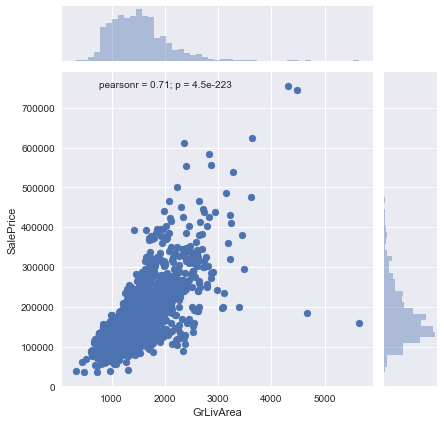

In [46]:
sns.jointplot(x="GrLivArea", y="SalePrice", data=train)

From the descriptive thing:
    "There are 5 observations that an instructor may wish to remove from the data set before giving it to students (a plot of SALE PRICE versus GR LIV AREA will indicate them quickly). Three of them are true outliers (Partial Sales that likely don’t represent actual market values) and two of them are simply unusual sales (very large houses priced relatively appropriately)."

In [47]:
#removing the 2 outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

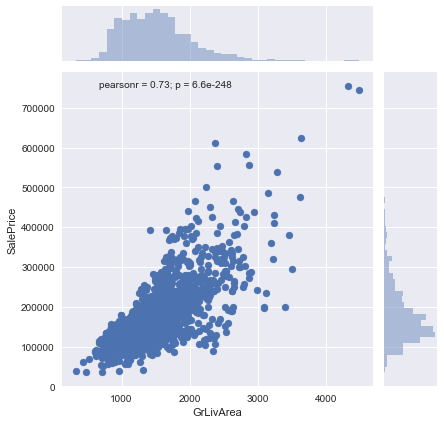

In [48]:
#replotting
sns.jointplot(x ="GrLivArea", y="SalePrice", data=train)

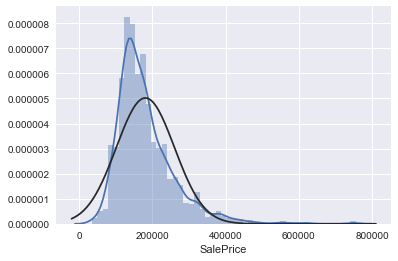

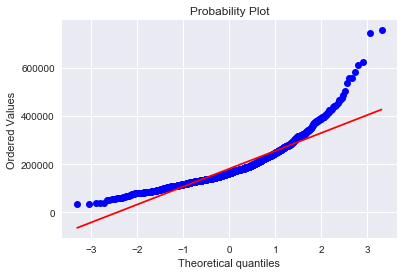

In [52]:
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

In [54]:
from sklearn import preprocessing
from scipy.stats import boxcox

In [61]:
# correcting the skew and kurtosis on our SalePrice variable using BoxCox
train['SalePrice'] = preprocessing.scale(boxcox(train['SalePrice']+1)[0])

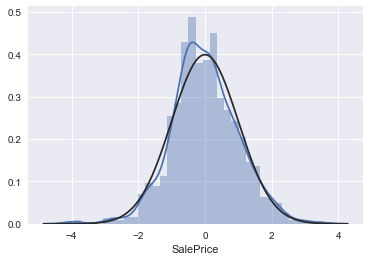

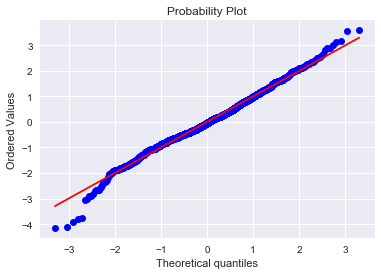

In [62]:
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

In [63]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
data = pd.concat((train, test)).reset_index(drop=True)
data.drop(['SalePrice'], axis=1, inplace=True)
print("data size is : {}".format(data.shape))

data size is : (2917, 79)


In [75]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(35)

,Total,Percent
PoolQC,2908,99.691464
MiscFeature,2812,96.400411
Alley,2719,93.212204
Fence,2346,80.425094
FireplaceQu,1420,48.680151
LotFrontage,486,16.660953
GarageFinish,159,5.450806
GarageQual,159,5.450806
GarageYrBlt,159,5.450806
GarageCond,159,5.450806


Missing Features:
    Alley: data desc says na means "no alley access"
    BsmtQual, BsmtCond, BsmntExposure, BsmtFinType1, BsmtFinType2: data desc says NA means "no basement"
    FireplaceQU: desc says NA means "No Fireplace"
    GarageType, GarageFinish,GaraGarageQual, GarageCond: desc says NA means "No Garage"
    PoolQC: desc says NA means "No Pool"
    Fence: desc says NA means "No Fence"
    MiscFeature: desc says NA means "None"

In [82]:
data["Alley"] = data["Alley"].fillna("None")
data["BsmtQual"] = data["BsmtQual"].fillna("None")
data["BsmtCond"] = data["BsmtCond"].fillna("None")
data["BsmtExposure"] = data["BsmtExposure"].fillna("None")
data["BsmtFinType1"] = data["BsmtFinType1"].fillna("None")
data["BsmtFinType2"] = data["BsmtFinType2"].fillna("None")

In [83]:
data["FireplaceQu"] = data["FireplaceQu"].fillna("None")
data["GarageType"] = data["GarageType"].fillna("None")
#data["GarageYrBlt"] = data["GarageYrBlt"].fillna("None") zero or ?
data["GarageFinish"] = data["GarageFinish"].fillna("None")
data["GarageQual"] = data["GarageQual"].fillna("None")
data["GarageCond"] = data["GarageCond"].fillna("None")
data["PoolQC"] = data["PoolQC"].fillna("None")
data["Fence"] = data["Fence"].fillna("None")
data["MiscFeature"] = data["MiscFeature"].fillna("None")

In [138]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(12)

,Total,Percent
MSZoning,4,0.137127
Utilities,2,0.068564
Functional,2,0.068564
GarageCars,1,0.034282
GarageArea,1,0.034282
KitchenQual,1,0.034282
SaleType,1,0.034282
Electrical,1,0.034282
Exterior1st,1,0.034282
Exterior2nd,1,0.034282


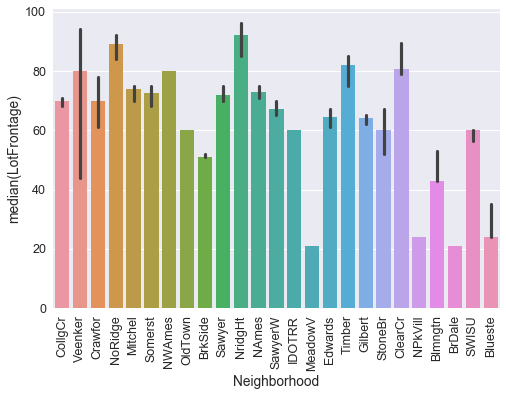

In [136]:
sns.barplot(data=data,x='Neighborhood',y='LotFrontage', estimator=np.median)
plt.xticks(rotation=90)
plt.show()
plt.gcf().clear()

neighborhood seems a pretty good at determining lot frontage

In [137]:
data["LotFrontage"] = data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [134]:
data["GarageYrBlt"] = data["GarageYrBlt"].fillna(0)

most likely no basement so setting these basement measurements to zero

In [103]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    data[col] = data[col].fillna(0)

Probably no masonry veneer for these houses so setting to 0 or none

In [104]:
data["MasVnrType"] = data["MasVnrType"].fillna("None")
data["MasVnrArea"] = data["MasVnrArea"].fillna(0)

In [100]:
data_corr = data.corr()

In [101]:
data_corr

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
1stFlrSF,1.000000,-0.264402,0.045421,0.109621,0.434789,0.087354,0.255835,0.012522,0.301604,-0.065270,...,-0.157898,0.475793,0.084822,0.101633,0.384291,0.793537,0.227100,0.310916,0.241325,-0.013129
2ndFlrSF,-0.264402,1.000000,-0.032363,0.504121,-0.176523,-0.097487,-0.164547,-0.060022,-0.000965,0.055264,...,0.006241,0.242621,0.039280,0.011505,0.583146,-0.222168,0.088764,0.015896,0.157674,-0.018760
3SsnPorch,0.045421,-0.032363,1.000000,-0.048267,0.052797,-0.023300,0.027570,0.026844,-0.005793,-0.032849,...,0.043707,0.018962,-0.006248,-0.029567,-0.025628,0.039526,-0.003871,0.016050,0.037530,0.022546
BedroomAbvGr,0.109621,0.504121,-0.048267,1.000000,-0.117430,-0.031190,-0.155711,0.018878,0.183249,0.049985,...,-0.008419,0.072945,0.036921,0.007288,0.671781,0.053895,0.031546,-0.053267,-0.022054,-0.020428
BsmtFinSF1,0.434789,-0.176523,0.052797,-0.117430,1.000000,-0.054893,0.643076,0.081762,-0.490052,-0.100367,...,-0.048988,0.274839,0.033994,0.100902,0.035344,0.511387,0.224298,0.280488,0.150000,0.023359
BsmtFinSF2,0.087354,-0.097487,-0.023300,-0.031190,-0.054893,1.000000,0.163534,0.099440,-0.238221,0.032670,...,0.041404,-0.042326,0.047345,0.063248,-0.047950,0.093548,0.098617,-0.027369,-0.061954,0.008839
BsmtFullBath,0.255835,-0.164547,0.027570,-0.155711,0.643076,0.163534,1.000000,-0.148745,-0.399459,-0.068011,...,-0.041500,0.161368,0.031277,0.053614,-0.043869,0.321231,0.185172,0.210367,0.133649,0.045400
BsmtHalfBath,0.012522,-0.060022,0.026844,0.018878,0.081762,0.099440,-0.148745,1.000000,-0.107090,-0.009737,...,0.084104,-0.040364,0.070188,0.042022,-0.049236,0.014167,0.051724,-0.030093,-0.046111,-0.020068
BsmtUnfSF,0.301604,-0.000965,-0.005793,0.183249,-0.490052,-0.238221,-0.399459,-0.107090,1.000000,0.005069,...,-0.138139,0.275449,-0.032280,-0.049114,0.247963,0.423342,-0.039471,0.130347,0.165067,-0.037860
EnclosedPorch,-0.065270,0.055264,-0.032849,0.049985,-0.100367,0.032670,-0.068011,-0.009737,0.005069,1.000000,...,0.070928,-0.138945,0.097220,-0.064452,0.016197,-0.085813,-0.118926,-0.373978,-0.220283,-0.001189


In [117]:
data.groupby('Fence').nunique()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
Fence,,,,,,,,,,,,,,,,,,,,,
GdPrv,103,57,2,3,6,5,4,5,82,24,...,3,15,1,9,97,1,59,58,49,5
GdWo,96,27,3,3,5,3,4,5,87,21,...,3,13,1,7,90,1,39,48,45,5
MnPrv,242,106,7,3,5,4,4,5,226,68,...,5,32,2,10,226,1,95,88,59,5
MnWw,12,5,2,2,3,1,2,4,12,5,...,2,2,1,3,11,1,8,10,12,4
None,983,558,23,3,8,5,5,5,878,200,...,9,101,2,14,966,2,325,113,61,5


In [125]:
data.groupby('MasVnrType').nunique()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
MasVnrType,,,,,,,,,,,,,,,,,,,,,
BrkCmn,24,7,1,1,3,2,2,5,19,7,...,2,3,2,5,22,1,9,16,16,5
BrkFace,586,246,13,3,7,5,4,5,519,98,...,7,69,2,10,559,2,223,75,60,5
None,774,474,19,3,8,5,5,5,678,193,...,9,78,2,13,719,1,280,117,61,5
Stone,201,57,3,3,6,5,3,4,161,14,...,8,17,1,10,200,1,80,40,34,5


In [130]:
data.groupby('PoolArea').nunique()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
PoolArea,,,,,,,,,,,,,,,,,,,,,
0,1075,629,31,3,8,5,5,5,987,269,...,9,120,2,14,1052,2,377,118,61,5
144,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
228,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
368,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
444,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
512,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
519,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
555,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
561,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
